<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-MCD/blob/main/02-Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Preprocesamiento de Texto</h1>

En esta notebook visualizaremos algunos conceptos del preprocesamiento de texto, particularmente:

* Tokenización
* Stemming
* Named Entity Recognition
* POS Tagging

Para esto, estudiaremos algunos ejemplos que serán procesados por las clases del módulo [spaCy](https://spacy.io/). No es una guía minuciosa del uso de este módulo, son solamente algunos ejemplos ilustrativos.

Verificar que la versión de spaCy sea la 3.*

In [ ]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.5                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.7.1)        



In [ ]:
 import spacy

Ya que hemos importado spaCy, necesitamos cargar un modelo estadístico de lenguaje. SpaCy ofrece una variedad de modelos para diferentes idiomas. Estos modelos ayudan con la tokenization, etiquetado PoS (part-of-speech), NER (named entity recognition) y más.

Bajamos y cargamos el modelo estadístico de lenguaje **en_core_web_sm**, es el modelo más pequeño en inglés de spaCy y un buen punto de partida.

Documentación del modelo: https://spacy.io/models/en#en_core_web_sm<br>
Modelos disponibles: https://spacy.io/models<br>
Uso de los modelos: https://spacy.io/usage/models

🔵 Información adicional del modelo

**en_core_web_sm** fué entrenado en el corpus OntoNotes 5, el cual es un corpus anotado que contiene noticias, blogs, transcripciones, etc. Los documentos del corpus están anotados con información de como cada oración debería *parsearse* (parsing), part-of-speech de cada palabra, si cada palabra es una *named entity*, entre otras cosas.

https://catalog.ldc.upenn.edu/LDC2013T19



En principio no hay necesidad de bajarlo

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load('en_core_web_sm')

Ya hemos cargado el modelo, la variable `nlp` hace referencia a una instancia de la clase [`Language`](https://spacy.io/api/language) que contiene metodos para varias tareas (tokenización, etc.) y un pipeline de procesamiento.

Usaremos este modelo de lenguaje para realizar algunas tareas de preprocesamiento de PLN.


In [ ]:
type(nlp)

spacy.lang.en.English

# Tokenización


Al pasar cualquier texto a la instancia `nlp` obtenemos un objeto [`Doc`](https://spacy.io/api/doc) que contiene el texto tokenizado e información adicional para cada [token](https://spacy.io/api/token).

In [ ]:
# Sample sentence.
text = "He didn't want to pay $20 for this book."
doc = nlp(text)
print(doc,'\n',type(doc))

He didn't want to pay $20 for this book. 
 <class 'spacy.tokens.doc.Doc'>


Veamos los tokens

In [ ]:
print([t.text for t in doc])

['He', 'did', "n't", 'want', 'to', 'pay', '$', '20', 'for', 'this', 'book', '.']


Observar que:
- "didn't" se separa en "did" y "n't".
- El símbolo de moneda y el número están separados.
- El punto final es también un token.

Una tokenización *naive*:

In [ ]:
text.split()

['He', "didn't", 'want', 'to', 'pay', '$20', 'for', 'this', 'book.']

El objeto `Doc` puede ser indexado y *sliced* como si fuera una lista:

In [ ]:
print(doc[0])
print(type(doc[0]))

He
<class 'spacy.tokens.token.Token'>


In [ ]:
print(doc[:3])
print(doc[-5:])

He didn't
20 for this book.


Podemos recuperar el texto original:

In [ ]:
print(doc.text)

He didn't want to pay $20 for this book.


Podemos tokenizar multiples oraciones y accesar a ellas individualmente usando la propiedad `sents` del objeto `Doc`.

In [ ]:
s = """Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next. First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc = nlp(s)

lista_oraciones = [sent for sent in doc.sents]

print(lista_oraciones)
print(len(lista_oraciones))

[Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next., First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs.]
2


Algunos casos de errores en la tokenización: https://github.com/explosion/spaCy/issues/3052



# Reconocimiento de entidades nombradas (NER)

Podemos buscar entidades nombradas en el texto usando las anotaciones de los tokens

In [ ]:
entities = list(doc.ents)

print(entities)
print(entities[0].label_)

[20]
MONEY


In [ ]:
doc2 = nlp('''I have $20 worth of things to buy in New York city,
I can afford more things in Mexico or Latin America, certainly not the Starry Night painting though.
Lastly, I think I met Zeus at a McKenzie group consulting meeting in NYC last summer.''')

[(x,x.label_) for x in list(doc2.ents)]

[(20, 'MONEY'),
 (New York, 'GPE'),
 (Mexico, 'GPE'),
 (Latin America, 'LOC'),
 (Starry Night, 'WORK_OF_ART'),
 (Zeus, 'PERSON'),
 (McKenzie, 'ORG'),
 (NYC, 'LOC'),
 (last summer, 'DATE')]

Observa que el NER no agrupa tokens juntos, estas agrupaciones se hacen de forma separada en el atributo `ents`.

In [ ]:
[x.text for x in doc2]

['I',
 'have',
 '$',
 '20',
 'worth',
 'of',
 'things',
 'to',
 'buy',
 'in',
 'New',
 'York',
 'city',
 ',',
 '\n',
 'I',
 'can',
 'afford',
 'more',
 'things',
 'in',
 'Mexico',
 'or',
 'Latin',
 'America',
 ',',
 'certainly',
 'not',
 'the',
 'Starry',
 'Night',
 'painting',
 'though',
 '.',
 '\n',
 'Lastly',
 ',',
 'I',
 'think',
 'I',
 'met',
 'Zeus',
 'at',
 'a',
 'McKenzie',
 'group',
 'consulting',
 'meeting',
 'in',
 'NYC',
 'last',
 'summer',
 '.']

Algunas etiquetas de las entidades son:

* PERSON People, including fictional
* NORP Nationalities or religious or political groups
* FACILITY Buildings, airports, highways, bridges, etc.
* ORGANIZATION Companies, agencies, institutions, etc.
* GPE Countries, cities, states
* LOCATION Non-GPE locations, mountain ranges, bodies of water
* PRODUCT Vehicles, weapons, foods, etc. (Not services)
* EVENT Named hurricanes, battles, wars, sports events, etc.
* WORK OF ART Titles of books, songs, etc.
* LAW Named documents made into laws
* LANGUAGE Any named language

In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

Spacy cuenta con algunos visualizadores para NER y otras tareas.

https://spacy.io/usage/visualizers

In [ ]:
from spacy import displacy

displacy.render(doc2, style='ent', jupyter=True)

Podemos obtener, además, los índices de cada entidad en el texto original.

In [ ]:
print([(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc2.ents])

[('20', 'MONEY', 8, 10), ('New York', 'GPE', 37, 45), ('Mexico', 'GPE', 80, 86), ('Latin America', 'LOC', 90, 103), ('Starry Night', 'WORK_OF_ART', 123, 135), ('Zeus', 'PERSON', 175, 179), ('McKenzie', 'ORG', 185, 193), ('NYC', 'LOC', 222, 225), ('last summer', 'DATE', 226, 237)]


Para corpus domain-specific, un etiquetador NER puede ser afinado. En este ejemplo sería bueno que _The Martian_ fuera etiquetado como "FILM".

🔵 Esto puede aparecer más adelante en los ejercicios y en el curso.

In [ ]:
s = "Ridley Scott directed The Martian."
doc = nlp(s)
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

## Ejercicios

⭕ ¿Qué utilidad puede tener la tokenización?

### 1. Exploración descriptiva de documentos mediante tokenización

En este primer ejemplo describiremos el contenido de varios documentos que tratan sobre baseball. Exploraremos los términos más frecuentes mediante la construcción de una nube de palabras. Haremos el ejercicios usando, y sin usar, tokenización.

In [ ]:
!pip install -qq wordcloud

In [ ]:
from sklearn.datasets import fetch_20newsgroups

docs_newsgroups = fetch_20newsgroups(subset='train',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=['rec.sport.baseball']
                                     )

lista_docs_20ng = docs_newsgroups.data
print(f"{len(lista_docs_20ng)} documentos")

597 documentos


Sin tokenizar:

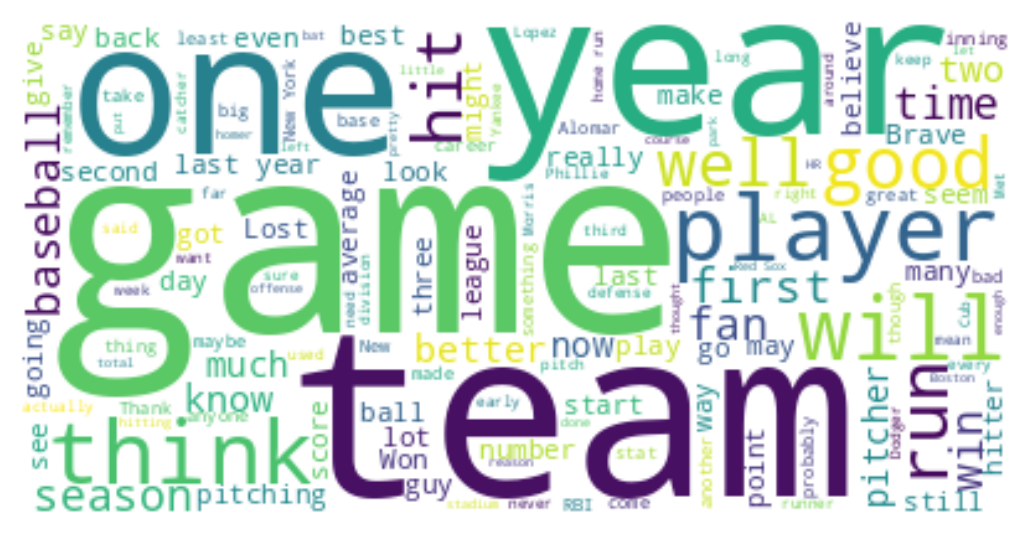

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_docs_20ng))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizando:

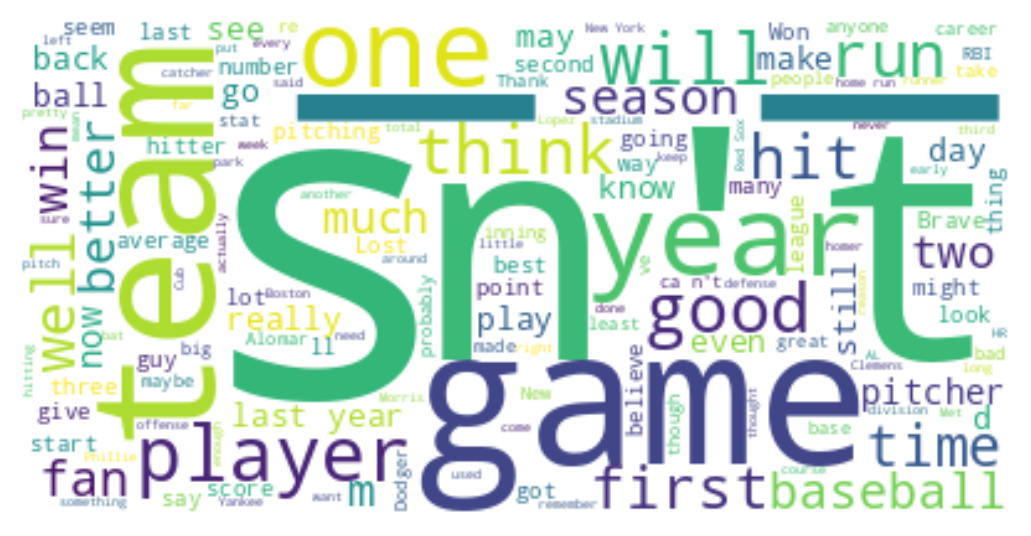

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs_spacy = nlp(" ".join(lista_docs_20ng))
lista_tokens = [t.text for t in docs_spacy]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizar y quitando stop-words:

In [ ]:
from collections import Counter

dict(sorted(Counter(lista_tokens).items(), key=lambda x: x[1], reverse=True))

{'\n': 5004,
 ' ': 3983,
 ',': 3756,
 '.': 3739,
 'the': 3172,
 'to': 1459,
 'a': 1458,
 'and': 1216,
 'I': 1193,
 '-': 1126,
 'of': 1110,
 'in': 1057,
 '  ': 1037,
 '\n\n': 921,
 'is': 853,
 'that': 828,
 ')': 822,
 "'s": 664,
 '(': 654,
 '?': 570,
 'he': 568,
 '   ': 561,
 'for': 552,
 "n't": 550,
 '*': 542,
 'have': 501,
 'was': 486,
 '"': 471,
 '_': 469,
 'it': 446,
 'be': 432,
 'on': 417,
 'you': 395,
 'at': 388,
 'with': 378,
 '!': 358,
 'are': 350,
 'this': 349,
 '1': 348,
 'but': 338,
 'they': 332,
 'as': 331,
 'The': 326,
 '    ': 323,
 '\t': 322,
 'his': 309,
 '0': 304,
 'not': 301,
 'year': 298,
 'do': 289,
 ':': 284,
 '2': 259,
 '3': 257,
 'has': 246,
 'or': 241,
 'would': 230,
 'up': 229,
 'if': 220,
 '\n\n\n': 215,
 'out': 212,
 '\n ': 207,
 '4': 203,
 'game': 200,
 'will': 199,
 'had': 196,
 'one': 192,
 'team': 187,
 'than': 186,
 'think': 186,
 'good': 185,
 'who': 184,
 'all': 183,
 'so': 180,
 'more': 179,
 '5': 179,
 '--': 178,
 'an': 174,
 "'": 172,
 'last': 170,
 

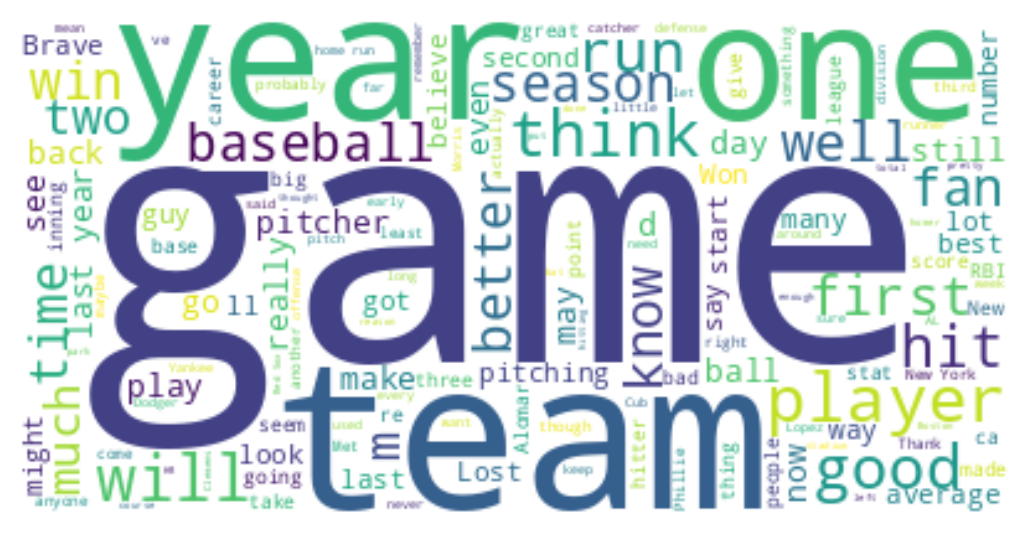

In [ ]:
lista_tokens = [t.text for t in docs_spacy
                if t.text not in ["n't","."," ","'s","_","\n"]]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

### Imprime una lista de todas las entidades nombradas que aparecen en estos documentos

Al ser de baseball podrían aparecer nombres de jugadores y equipos, ¿el NER los atrapa?

### 2. Tokenizando con NLTK y NLP-Core

[NLTK](https://www.nltk.org/) (**N**atural **L**anguage **T**ool**K**it) es otro módulo para tareas de NLP.  Usando los tokenizadores `TreebankWordTokenizer` y `word_tokenize` de NLTK, tokeniza el parrafo un texto de tu elección y compara la tokenización con spacy. ¿Es la misma?

[Core-NLP](https://stanfordnlp.github.io/CoreNLP/) es una suite para tareas de NLP, está escrita en Java, por lo que no se puede usar directamente en Python. Puedes usar el [demo online](https://corenlp.run/). Tokeniza el mismo texto usando esta herramienta. ¿Qué más información puedes ver?


### 3. Tokenizando en español

* Prueba un modelo en español de scipy para tokenizar el siguiente texto. Inspecciona la lista de tokens. ¿Notas algún caso particular de interés?
* Revisa las entidades nombradas que reconoce, ¿le faltó alguna? ¿hay alguna que no sea correcta?

In [ ]:
texto = '''
Edward Benjamin Britten (Lowestoft, 22 de noviembre de 1913-Aldeburgh, 4 de diciembre de 1976), fue un compositor, director de orquesta y pianista británico. Fue una figura central de la música británica del siglo XX, con un abanico de obras que incluye ópera, otra música vocal y piezas orquestales y de cámara. Entre sus obras más conocidas figuran la ópera Peter Grimes (1945), el Réquiem de guerra (1962) y la pieza orquestal The Young Person's Guide to the Orchestra (1945).
'''

### 4. Usando los tokenizadores mencionados arriba, ¿la tokenización separa prefijos? Prueba en español e inglés.

### 5. Revisa los contenidos del curso [spaCy 101: Everything you need to know](https://spacy.io/usage/spacy-101)

Te ayudará a identificar qué tipo de cosas se pueden hacer con spacy para futuras referencias.

# Más preprocesamiento: Mayúsculas/Minúsculas, Stop Words Removal, Stemming y Lematización.


spaCy performs all these preprocessing steps (except stemming) behind the scenes for you. Inline with its non-destructive policy, the tokens aren't modified directly. Rather, each **Token** object has a number of attributes which can help you get views of your document with these pre-processing steps applied. The attributes a **Token** has can be found here:<br>
https://spacy.io/api/token#attributes
<br><br>
More information about spaCy's processing pipeline:<br>
https://spacy.io/usage/processing-pipelines

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

s = "Scientists have developed a new, more energy-efficient way for AI algorithms to process data. His model may become the basis for a new generation of AI that learns like we do."
doc = nlp(s)

## Mayúsculas/Minúsculas

Podemos escribir los tokens en minúsculas:

In [ ]:
print([t.lower_ for t in doc])

['scientists', 'have', 'developed', 'a', 'new', ',', 'more', 'energy', '-', 'efficient', 'way', 'for', 'ai', 'algorithms', 'to', 'process', 'data', '.', 'his', 'model', 'may', 'become', 'the', 'basis', 'for', 'a', 'new', 'generation', 'of', 'ai', 'that', 'learns', 'like', 'we', 'do', '.']


Esto nos da flexibilidad para realizar otras tareas, como no cambiar a minúscula si es el inicio de una oración.

In [ ]:
print([t.lower_ if not t.is_sent_start else t for t in doc])

[Scientists, 'have', 'developed', 'a', 'new', ',', 'more', 'energy', '-', 'efficient', 'way', 'for', 'ai', 'algorithms', 'to', 'process', 'data', '.', His, 'model', 'may', 'become', 'the', 'basis', 'for', 'a', 'new', 'generation', 'of', 'ai', 'that', 'learns', 'like', 'we', 'do', '.']


## Stop Word Removal

Las stop words son palabras de una lista (stoplist) que se filtran antes o después del procesamiento de texto ya que se consideran insignificantes.

spaCy incluye una lista por default de stop words. Observa que cada token viene anotado con el atributo `is_stop`.

In [ ]:
print([t for t in doc if not t.is_stop])

[Scientists, developed, new, ,, energy, -, efficient, way, AI, algorithms, process, data, ., model, basis, new, generation, AI, learns, like, .]


Pdemos ver todas las stopwords. Podemos recuperarlas desde el módulo de spacy, o desde el modelo de lenguaje.

In [ ]:
from spacy.lang.en import stop_words

# --- Manera 1
stop_words = stop_words.STOP_WORDS
print(stop_words)

# --- Manera 2
stop_words_model = nlp.Defaults.stop_words
print(stop_words_model)
print(len(nlp.Defaults.stop_words))

{'somewhere', 'across', 'behind', '’ll', 'show', 'give', 'off', 'full', 'every', 'because', 'wherever', '’s', 'someone', 'onto', 'myself', 'once', 'those', 'meanwhile', 'very', 'both', 'much', 'beyond', 'itself', 'it', '‘re', 'latterly', 'must', 'but', 'our', 'of', 'none', 'however', 'regarding', 'same', 'too', 'the', 'along', 'eleven', 'almost', 'does', 'always', 'might', 'is', 'anyway', '’m', 'fifteen', 'just', 'take', 'nobody', 'became', 'whereby', 'so', 'therein', 'them', 'if', 'afterwards', 'am', 'first', 'all', 'due', 'others', 'again', 'upon', 'two', 'together', 'then', 'least', 'used', 'have', 'sometimes', 'each', 'my', 'herself', 'whose', 'whenever', 'nowhere', "'ve", 'for', 'against', 'become', 'yours', 'above', 'many', 'third', 'several', 'anyone', 'amount', 'into', 'before', 'per', 'its', 'forty', 'themselves', 'part', 'see', 'do', 'thereby', 'when', 'towards', 'this', 'through', 'further', 'there', '’re', 'an', 'between', 'hereafter', 're', 'becomes', '‘d', 'alone', 'these

Exploremos los signos de puntuación:

In [ ]:
from string import punctuation

punctuations = list(punctuation)
print(punctuations)
print(len(punctuations))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
32


Además de quitar stop words también podemos quitar los signos de puntuación:

In [ ]:
print([t for t in doc if not t.is_stop and t.text not in punctuations])

[Scientists, developed, new, energy, efficient, way, AI, algorithms, process, data, model, basis, new, generation, AI, learns, like]


## Lematización

La **lematización** es el proceso de reducir una palabra a su forma base (lema). Se utiliza para:

* Reducir la dimensionalidad del espacio de características, al mapear palabras relacionadas a un solo lema.
* Mejorar la precisión de los modelos de lenguaje, al tratar palabras con el mismo significado como una sola entidad.
* Facilitar la comparación y el análisis de textos, al estandarizar la forma de las palabras.

In [ ]:
[(t.text, t.lemma_) for t in doc]

[('Scientists', 'scientist'),
 ('have', 'have'),
 ('developed', 'develop'),
 ('a', 'a'),
 ('new', 'new'),
 (',', ','),
 ('more', 'more'),
 ('energy', 'energy'),
 ('-', '-'),
 ('efficient', 'efficient'),
 ('way', 'way'),
 ('for', 'for'),
 ('AI', 'AI'),
 ('algorithms', 'algorithm'),
 ('to', 'to'),
 ('process', 'process'),
 ('data', 'datum'),
 ('.', '.'),
 ('His', 'his'),
 ('model', 'model'),
 ('may', 'may'),
 ('become', 'become'),
 ('the', 'the'),
 ('basis', 'basis'),
 ('for', 'for'),
 ('a', 'a'),
 ('new', 'new'),
 ('generation', 'generation'),
 ('of', 'of'),
 ('AI', 'AI'),
 ('that', 'that'),
 ('learns', 'learn'),
 ('like', 'like'),
 ('we', 'we'),
 ('do', 'do'),
 ('.', '.')]

Veamos los que cambiaron:

In [ ]:
[(t.text, t.lemma_) for t in doc if t.text != t.lemma_]

[('Scientists', 'scientist'),
 ('developed', 'develop'),
 ('algorithms', 'algorithm'),
 ('data', 'datum'),
 ('His', 'his'),
 ('learns', 'learn')]

## Ejercicios - Tarea 2

### Repite la nube de palabras con los documentos del 20newsgroups

Produciremos nubes de palabras secuenciales:

* Quitando stopwords y signos de puntuación.
* Quitando stopwords y puntuación, además aplicando lematización.
* Quitando stopwords y puntuación, además aplicando stemming (spacy no lo soporta nativamente, busca opciones en NLTK).

¿Cuál consideras que captura de manera más clara la temática de los documentos?

### Repite la estrategia que hayas escogido como la mejor para analizar ahora otro conjunto de documentos.

Escoge documentos de otro tema del mismo corpus 20newsgroups. Aplica la misma estrategia anterior para producir dos nubes de palabras.


¿Consideras que ambas nubes de palabras reflejan las temáticas subyacentes de los documentos?

## Etiquetado Part-of-Speech


spaCy realiza, como parte de su pipeline, el etiquetado Part-of-Speech (POS).

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
s = "John watched an old movie at the cinema."
doc = nlp(s)

Las etiquetas POS se pueden ver en el atributo `pos_`

In [ ]:
[(t.text, t.pos_) for t in doc]

[('John', 'PROPN'),
 ('watched', 'VERB'),
 ('an', 'DET'),
 ('old', 'ADJ'),
 ('movie', 'NOUN'),
 ('at', 'ADP'),
 ('the', 'DET'),
 ('cinema', 'NOUN'),
 ('.', 'PUNCT')]

Con `spacy.explain` podemos obtener una descripción de las abreviaturas.

In [ ]:
spacy.explain('PROPN')

'proper noun'

Con el atributo `tag_` podemos obtener información más detallada, acerca de cada token.

In [ ]:
[(t.text, t.tag_) for t in doc]

[('John', 'NNP'),
 ('watched', 'VBD'),
 ('an', 'DT'),
 ('old', 'JJ'),
 ('movie', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('cinema', 'NN'),
 ('.', '.')]

Descripción:

In [ ]:
print(spacy.explain('NNP'))
print(spacy.explain('VBD'))
print(spacy.explain('JJ'))

noun, proper singular
verb, past tense
adjective (English), other noun-modifier (Chinese)


### Parsing

SpaCy también realiza el parsing como parte de su pipeline. Visualicemos un ejemplo.

In [ ]:
s = "She enrolled in the course at the university."
doc = nlp(s)

displacy.render(doc, style='dep', jupyter=True)

Para cada par de dependencias, spaCy muestra el nodo *hijo* (hacia donde apunta la flecha), el nodo *padre* (desde donde se apunta) y su relación (la etiqueta sobre la flecha).

Más información: https://spacy.io/api/annotation#dependency-parsing

Como siempre, podemos ver más detalles con `spacy.explain`.

In [ ]:
print(spacy.explain('nsubj'))
print(spacy.explain('dobj'))
print(spacy.explain('prep'))

nominal subject
direct object
prepositional modifier


Podemos acceder a las etiquetas de dependenciaa través del atributo `dep_`.

In [ ]:
[(t.text, t.dep_) for t in doc]

[('She', 'nsubj'),
 ('enrolled', 'ROOT'),
 ('in', 'prep'),
 ('the', 'det'),
 ('course', 'pobj'),
 ('at', 'prep'),
 ('the', 'det'),
 ('university', 'pobj'),
 ('.', 'punct')]

Observa que 'enrolled' es el _ROOT_. A continuación podemos darnos una idea de cómo ocurre el etiquetado en el pipeline.


In [ ]:
[(t.text, t.dep_, t.head.text) for t in doc]

[('She', 'nsubj', 'enrolled'),
 ('enrolled', 'ROOT', 'enrolled'),
 ('in', 'prep', 'enrolled'),
 ('the', 'det', 'course'),
 ('course', 'pobj', 'in'),
 ('at', 'prep', 'course'),
 ('the', 'det', 'university'),
 ('university', 'pobj', 'at'),
 ('.', 'punct', 'enrolled')]